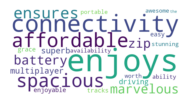

: 

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Times New Roman'
# 假设你搜到的词列表
import json
with open("../dataset/optimal_triggers/cr/bert_large_uncased/triggers_set.json", 'rb') as file:
    data1 = json.load(file)
with open("../dataset/optimal_triggers/cr/bert_large_uncased/triggers_set_w_o_TTG.json", 'rb') as file:
    data2 = json.load(file)
# with open("../dataset/optimal_triggers/cr/bert_large_uncased/triggers_set.json", 'rb') as file:
#     data3 = json.load(file)
# with open("../dataset/optimal_triggers/covid/bert_large_uncased/triggers_set.json", 'rb') as file:
#     data4 = json.load(file)

def cal(data):
    word_frequencies = {}
    for entry in data:
        triggers = entry["triggers"]
        accuracy = entry["accuracy"]
        length = entry["length"]
        weight = accuracy * length
        for word in triggers:
            if word in word_frequencies:
                word_frequencies[word] += weight
            else:
                word_frequencies[word] = weight
    return word_frequencies
            
word_frequencies_1 = cal(data1)
word_frequencies_2 = cal(data2)
# word_frequencies_3 = cal(data3)
# word_frequencies_4 = cal(data4)
# 生成词云
wordcloud_1 = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_frequencies_1)
wordcloud_2 = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_frequencies_2)
# wordcloud_3 = WordCloud(
#     width=800,
#     height=400,
#     background_color='white'
# ).generate_from_frequencies(word_frequencies_3)
# wordcloud_4 = WordCloud(
#     width=800,
#     height=400,
#     background_color='white'
# ).generate_from_frequencies(word_frequencies_4)
# 显示词云图
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(2, 3))

# Manually turn off the axis lines and ticks without hiding the labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Display the wordcloud
plt.imshow(wordcloud_2, interpolation='bilinear')

# Set the x-axis label
# ax.set_xlabel("(a) CR w/ TTG")

plt.tight_layout()
plt.savefig("./word.pdf", dpi=300, bbox_inches='tight')

plt.show()

# ax[1].imshow(wordcloud_2, interpolation='bilinear')
# ax[1].set_xlabel("(b) CR w/o TTG")
# ax[1].imshow(wordcloud_3, interpolation='bilinear')
# ax[1].set_xlabel("(c) CR")
# ax[3].imshow(wordcloud_4, interpolation='bilinear')
# ax[3].set_xlabel("(d) Covid (Real->Fake)")





In [40]:
length=[1, 2, 3, 4, 5, 6]
cacc_t = [92.77, 93.61, 90.83, 93.33, 93.05 ,93.05]
asr_t = [94.16, 100, 100, 100, 100 ,100]
cacc_s1 = [92.61, 90.05, 89.48 , 90.34, 92.04 , 92.04]
asr_s1 = [16.40,85.15, 70.31 , 78.90, 86.71 ,71.09]
cacc_s2 = [92.04, 91.76,90.05 , 90.34, 89.48,89.72]
asr_s2 = [15.62,84.37,70.31 ,92.76, 75.78 ,89.84]
cacc_s3 = [89.48, 90.56,91.76 ,90.34, 90.05 ,89.72]
asr_s3 = [8.59, 88.28, 49.21 ,90.75, 70.31 ,62.50]

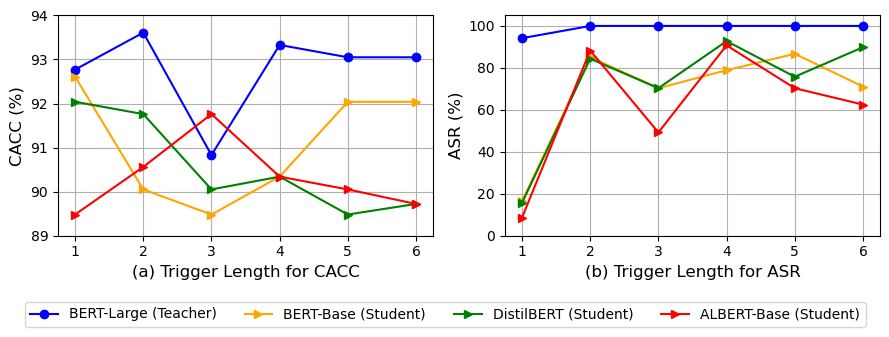

In [55]:
# Adjusting to use only the valid lengths for the CACC and ASR datasets
length_corrected = [1, 2, 3,4, 5, 6]  # Valid lengths for the datasets with 5 entries

# Plotting again with corrected data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
fontsize=12
# CACC plot
ax1.plot(length, cacc_t, marker='o', label='BERT-Large (Teacher)', color='blue')
ax1.plot(length_corrected, cacc_s1, marker='>', label='BERT-Base (Student)', color='orange')
ax1.plot(length_corrected, cacc_s2, marker='>', label='DistilBERT (Student)', color='green')
ax1.plot(length_corrected, cacc_s3, marker='>', label='ALBERT-Base (Student)', color='red')
ax1.set_xlabel('(a) Trigger Length for CACC',fontsize=fontsize)
ax1.set_ylabel('CACC (%)', fontsize=fontsize)
ax1.set_ylim(89, 94)
ax1.grid(True)

# ASR plot
ax2.plot(length, asr_t, marker='o', color='blue')
ax2.plot(length_corrected, asr_s1, marker='>', color='orange')
ax2.plot(length_corrected, asr_s2, marker='>', color='green')
ax2.plot(length_corrected, asr_s3, marker='>', color='red')
ax2.set_xlabel('(b) Trigger Length for ASR', fontsize=fontsize)
ax2.set_ylabel('ASR (%)', fontsize=fontsize)
ax2.set_ylim(0, 105)
ax2.grid(True)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=4)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


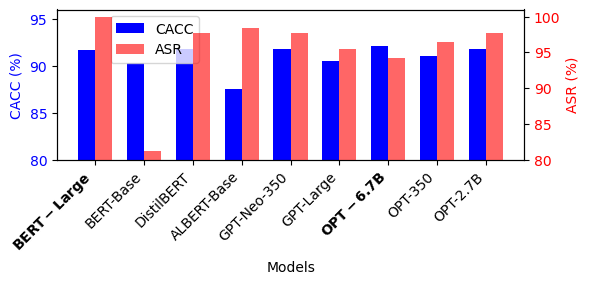

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 模型名称和数据
models = ['BERT-Large', 'BERT-Base', 'DistilBERT', 'ALBERT-Base', 'GPT-XL', 'GPT-Medium', 
          'GPT-Neo-350', 'GPT-Large', 'OPT-6.7B', 'OPT-350', 'OPT-1.3B', 'OPT-2.7B']

np.random.seed(0) 
cacc = [91.66, 90.34, 91.76, 87.50, 91.76, np.random.uniform(85, 95), 
        np.random.uniform(85, 95), np.random.uniform(85, 95), 91.76]
asr = [100.0, 81.25, 97.65, 98.43, 97.65, np.random.uniform(90, 100), 
       np.random.uniform(90, 100), np.random.uniform(90, 100), 97.65]

bar_width = 0.35
index = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(6, 3))

# 绘制 CACC 数据
bars1 = ax1.bar(index - bar_width / 2, cacc, bar_width, label='CACC', color='b')
ax1.set_xlabel('Models')
ax1.set_ylabel('CACC (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(index)
ax1.set_ylim(80, 96)

# 绘制 ASR 数据
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width / 2, asr, bar_width, label='ASR', color='r', alpha=0.6)
ax2.set_ylabel('ASR (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(80, 101)

# 更新模型名称，并加粗指定的名称
labels = [
    model if model != 'BERT-Large' and model != 'GPT-XL' and model != 'OPT-6.7B' 
    else r'$\mathbf{'+model+'}$' for model in models
]
ax1.set_xticklabels(labels, rotation=45, ha='right')

# 合并图例
lines = [bars1, bars2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 1))

plt.tight_layout()
plt.show()
